In [1]:
import numpy as np
import pandas as pd


In [3]:
X_train = pd.read_csv('Diabetes_XTrain.csv')
Y_train = pd.read_csv('Diabetes_YTrain.csv')
X_test = pd.read_csv('Diabetes_Xtest.csv')
print(X_train.shape)
print(Y_train.shape)

(576, 8)
(576, 1)


In [4]:
X_train.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
5,7,100,0,0,0,30.0,0.484,32
6,4,110,66,0,0,31.9,0.471,29
7,1,111,86,19,0,30.1,0.143,23
8,3,169,74,19,125,29.9,0.268,31
9,1,71,62,0,0,21.8,0.416,26


In [5]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,3.758681,3.328783,0.000,1.00000,3.0000,6.00000,17.00
Glucose,576.0,119.975694,31.512914,0.000,99.00000,116.0000,139.00000,199.00
BloodPressure,576.0,68.826389,20.285812,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,576.0,20.364583,15.893856,0.000,0.00000,22.0000,32.00000,63.00
Insulin,576.0,76.166667,109.193550,0.000,0.00000,36.0000,120.00000,744.00
BMI,576.0,31.857292,8.134926,0.000,26.97500,32.0000,36.72500,67.10
DiabetesPedigreeFunction,576.0,0.481519,0.336910,0.078,0.24775,0.3815,0.64125,2.42
Age,576.0,32.954861,11.878137,21.000,24.00000,29.0000,40.00000,81.00


In [6]:
X_train = X_train.replace(value=np.NaN,to_replace=0)
X_test = X_test.replace(value=np.NaN,to_replace=0)
X_train['Pregnancies'] = X_train['Pregnancies'].replace(np.NaN,0)
X_test['Pregnancies'] = X_test['Pregnancies'].replace(np.NaN,0)

In [245]:
X_train['Insulin'].fillna(84,inplace=True)
X_train['Glucose'].fillna(119,inplace=True)
X_train['BMI'].fillna(31,inplace=True)
X_train['BloodPressure'].fillna(X_train['BloodPressure'].median(),inplace=True)
X_train['SkinThickness'].fillna(X_train['SkinThickness'].median,inplace=True)

X_test['Insulin'].fillna(84,inplace=True)
X_test['Glucose'].fillna(119,inplace=True)
X_test['BMI'].fillna(31,inplace=True)
X_test['BloodPressure'].fillna(X_test['BloodPressure'].median(),inplace=True)
X_test['SkinThickness'].fillna(X_test['SkinThickness'].median(),inplace=True)

In [246]:
X_train.head(n=20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.973725,1.564672,1.229435,1.483708e+00,2.155157e+00,8.251542e-01,0.906713,0.593118
1,1.274135,-0.350061,0.280590,-1.020969e-16,-6.693877e-17,-6.450444e-01,-0.725769,2.108507
2,0.973725,0.871407,0.280590,-1.020969e-16,-6.693877e-17,9.947926e-01,-0.666406,0.845683
3,-0.528325,-0.680187,-0.510114,-1.020049e+00,-7.096462e-01,7.591838e-02,1.144165,-0.417141
4,0.072495,0.277179,1.071294,-1.020049e+00,1.522668e+00,3.869219e-01,-0.743578,-0.838083
5,0.973725,-0.680187,-0.035692,-1.020969e-16,-6.693877e-17,-3.340409e-01,0.007364,-0.080388
6,0.072495,-0.350061,-0.510114,-1.020969e-16,-6.693877e-17,-6.544688e-02,-0.031222,-0.332953
7,-0.828736,-0.317048,1.071294,-1.133857e+00,-6.693877e-17,-3.199043e-01,-1.004775,-0.838083
8,-0.227915,1.597685,0.122449,-1.133857e+00,-2.755851e-01,-3.481774e-01,-0.633757,-0.164576
9,-0.828736,-1.637554,-0.826396,-1.020969e-16,-6.693877e-17,-1.493236e+00,-0.194470,-0.585518


In [247]:
import seaborn as sns

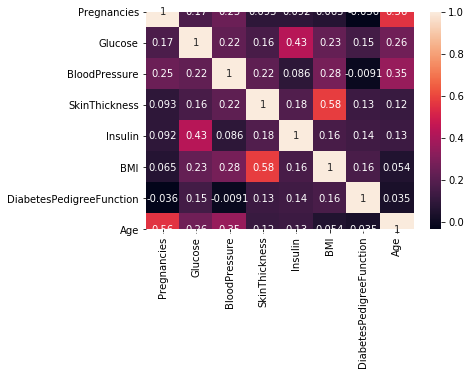

In [248]:
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [249]:
X_test['Pregnancies']  = (X_test['Pregnancies'] - X_train['Pregnancies'].mean()) / X_train['Pregnancies'].std()
X_test['DiabetesPedigreeFunction']  = (X_test['DiabetesPedigreeFunction'] - X_train['DiabetesPedigreeFunction'].mean()) / X_train['DiabetesPedigreeFunction'].std()
X_test['Glucose']  = (X_test['Glucose'] - X_train['Glucose'].mean()) / X_train['Glucose'].std()
X_test['Insulin'] = (X_test['Insulin'] - X_train['Insulin'].mean()) / X_train['Insulin'].std()
X_test['BloodPressure']  = (X_test['BloodPressure'] - X_train['BloodPressure'].mean()) / X_train['BloodPressure'].std()
X_test['SkinThickness']  = (X_test['SkinThickness'] - X_train['SkinThickness'].mean()) / X_train['SkinThickness'].std()
X_test['BMI']  = (X_test['BMI'] - X_train['BMI'].mean()) / X_train['BMI'].std()
X_test['Age']  = (X_test['Age'] - X_train['Age'].mean()) / X_train['Age'].std()

In [250]:
X_train['Pregnancies']  = (X_train['Pregnancies'] - X_train['Pregnancies'].mean()) / X_train['Pregnancies'].std()
X_train['DiabetesPedigreeFunction']  = (X_train['DiabetesPedigreeFunction'] - X_train['DiabetesPedigreeFunction'].mean()) / X_train['DiabetesPedigreeFunction'].std()
X_train['Glucose']  = (X_train['Glucose'] - X_train['Glucose'].mean()) / X_train['Glucose'].std()
X_train['Insulin'] = (X_train['Insulin'] - X_train['Insulin'].mean()) / X_train['Insulin'].std()
X_train['BloodPressure']  = (X_train['BloodPressure'] - X_train['BloodPressure'].mean()) / X_train['BloodPressure'].std()
X_train['SkinThickness']  = (X_train['SkinThickness'] - X_train['SkinThickness'].mean()) / X_train['SkinThickness'].std()
X_train['BMI']  = (X_train['BMI'] - X_train['BMI'].mean()) / X_train['BMI'].std()
X_train['Age']  = (X_train['Age'] - X_train['Age'].mean()) / X_train['Age'].std()

In [251]:
X = X_train.values
Y = Y_train.values
Xt= X_test.values

In [252]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def Knn(X,Y,queryP,k = 5):
    m = X.shape[0]
    dist = []
    
    for i in range(m):
        dist.append((distance(X[i],queryP),Y[i]))
        
    dist.sort()
    dist = dist[:k]
    class1 = 0
    class2 = 0
    for i in range(k):
        if dist[i][1] == 0:
            class1 +=1
        else:
            class2 +=1
    
    if(class1 > class2):
        return 0
    else:
        return 1
    


In [256]:
ans = []
for i in range(Xt.shape[0]):
    ans.append(Knn(X,Y,Xt[i],21))

In [257]:
print(ans)
print(len(ans))

[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]
192


In [258]:
df = pd.DataFrame(ans)
df.to_csv('sol.csv',header=['Outcome'],index=False)